In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np
import redapy

import matplotlib.pyplot as plt

agregarle un condición de pivot true para cuando el usuario necesite la tabla cruzada. La tabla cruzada te sirve para los mapas


In [8]:
ruta_l=r"Bases originales"
df=redapy.frequency(pd.read_excel(ruta_l+"\\areas_2017.xlsx"), pivot=True)
df["area"]=np.where(df["Urbano encuesta"]>df["Rural encuesta"],"1","2")
df[["area"]].to_excel(ruta_l+"\\INEI_area_2017.xlsx")

In [5]:
ruta_l=r"Bases originales"


# df2=pd.read_excel(ruta_l+"\\Bases originales\\identi_INEI_pro.xlsx",) ## tiene DNI
### df scrapeada por Diego usando el lenguaje Redatam y el portal de redatam
#df3=pd.read_excel(ruta_l+"\\Bases originales\\tablas_redatam.xlsx") ## tiene DNI
### df de ocupaciones económicas
df4=pd.read_excel(ruta_l+"\\ocupación_2017.xlsx") ## ocupaciones 2017
### df de edad en años
df5=pd.read_excel(ruta_l+"\\Edad en años_2017.xlsx") ## edad en años

mz1=pd.read_excel(ruta_l+"\\Mz_sin seguro_2017.xlsx") ## edad en años

## shp de provincias
prov=gpd.read_file(ruta_l+"\\Límites nacionales\\PROVINCIAS.zip")
dis=gpd.read_file(ruta_l+"\\Límites nacionales\\DISTRITOS.zip")


In [4]:
import pandas as pd
import geopandas as gpd

import numpy as np
import redapy

ruta_l=r"Bases originales"
dfc1=pd.read_excel(ruta_l+"\\carac_vivienda_2017.xlsx") ## Características de la vivienda
dfc1=redapy.cross_table(dfc1)
dfc1


freq
ubigeo fila                               columna                                                 
0101    Red pública dentro de la vivienda Red pública de desagüe dentro de la vivienda        8755
                                          Red pública de desagüe fuera de la vivienda, pe...   354
                                          Pozo séptico, tanque séptico o biodigestor           210
                                          Letrina (con tratamiento)                            213
                                          Pozo ciego o negro                                   910
...                                                                                            ...
2504    Vecino                            Pozo ciego o negro                                     0
                                          Río, acequia, canal o similar                          0
                                          Campo abierto o al aire libre                          0
                                          Otro                                                   0
                                          Total                                                  1

[15453 rows x 1 columns]

In [49]:
# mz1=pd.read_excel(ruta_l+"\\Mz_sin seguro_2017.xlsx") ## edad en años
# mz2=redapy.frequency(mz1)
mz2
# en el caso de las manzanas, existen manzanas sin datos, esto se puede limpiar con facilidad desde el multindex
mz2[mz2.ubigeo!="15010800010370088888"].pivot(index="ubigeo",columns="resp", values="fre")

resp,No se encuentra afiliado a ningún seguro,Si se encuentra afiliado a algún seguro
ubigeo,,
15010800010010000401,13,63
15010800010010000601,18,101
15010800010010000800,7,85
15010800010010000900,21,111
15010800010010001000,28,84
...,...,...
15010800010400003901,9,24
15010800010400004101,26,60
15010800010400004401,23,40


In [68]:
from segregation.singlegroup import Dissim

In [100]:
mz2=redapy.frequency(mz1)
mz2.head(2)
## en el caso de las manzanas, existen manzanas sin datos, esto se puede limpiar con facilidad desde el multindex
mz2[mz2.ubigeo!="15010800010370088888"].pivot(index="ubigeo",columns="resp", values="fre")

mzp["total"]=mzp.sum(axis=1)
mzp["ubigeo_2"]=mzp.index.str[:12]
mzp["Si se encuentra afiliado a algún seguro"]=mzp["Si se encuentra afiliado a algún seguro"].astype(int)

## Dissimilarity
list_d=mzp.groupby("ubigeo_2").count().reset_index()["ubigeo_2"].to_list()
list_d2=[]

for p in list_d:
    list_d2.append(Dissim(mzp[mzp.ubigeo_2==p], "Si se encuentra afiliado a algún seguro", "total").statistic)

In [101]:
list_d2

[0.19122185326456426,
 0.13735320778048152,
 0.14387910453381714,
 0.15167715908647594,
 0.1337503893387915]

### Frecuencias Univariables

##### Categoricas

In [9]:
df1=redapy.frequency(df)
df1.head()

,resp,fre,ubigeo
11,Quechua,1606,010101
12,Aimara,23,010101
13,Nativo o indígena de la amazonía,77,010101
14,Parte de otro pueblo indígena u originario,28,010101
15,"Negro, moreno, zambo, mulato / pueblo afroperu...",791,010101


<AxesSubplot: >

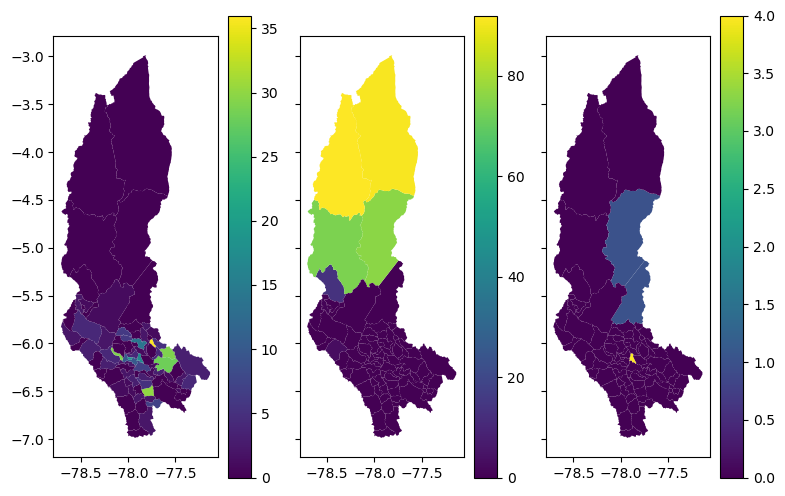

In [45]:
df=pd.read_excel(ruta_l+"\\identi_INEI.xlsx") ## Abrimos la BD descarga de Redatam
df1=redapy.frequency(df, pivot=True) ## aplicamos la limpieza

## Convertimos las columnas en porcentajes
df1["total"]=df1.sum(axis=1)
for p in df1.columns:
    df1[p]=((df1[p]/df1.total)*100).round()

# Agregamos la geometría
gdf1=dis.set_index("IDDIST")[['geometry']].merge(df1, right_index=True, left_index=True, how='outer', validate='1:1', indicator=True)

fig, ax=plt.subplots(1,3, figsize=(9,6),sharey=True)

gdf1.plot(column="Quechua", legend=True, figsize=(9,6), ax=ax[0], )
gdf1.plot(column="Nativo o indígena de la amazonía", legend=True, figsize=(9,6), ax=ax[1])
gdf1.plot(column="Parte de otro pueblo indígena u originario", legend=True, figsize=(9,6), ax=ax[2])

#### Ocupaciones 2017

In [18]:
# df4=pd.read_excel(ruta_l+"\\ocupación_2017.xlsx") ## ocupaciones 2017
dis=gpd.read_file(ruta_l+"\\Límites nacionales\\DISTRITOS.zip")
# ## ocupaciones
#ocup17=redapy.frequency(df4, pivot=True)

## Convertimos las columnas en porcentajes
ocup17["total"]=ocup17.sum(axis=1)
for p in ocup17.columns:
    ocup17[p]=((ocup17[p]/ocup17.total)*100).round()

ocup17    
# # Agregamos la geometría
# gdf2=dis.set_index("IDDIST")[['geometry']].merge(ocup17, right_index=True, left_index=True, how='outer', validate='1:1', indicator=True)

# fig, ax=plt.subplots(1,3, figsize=(15,6),sharex=True)

# gdf2.plot(column="Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros", legend=True, ax=ax[0])
# gdf2.plot(column="Trabajadores de los servicios y vendedores de comercios y mercados", legend=True, ax=ax[1])
# gdf2.plot(column="Profesionales científicos e intelectuales", legend=True, ax=ax[2])

resp,"Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros",Jefes y empleados administrativos,"Miembros del Poder Ejecutivo, Legislativo, Judicial y personal directivo de la administración pública y privada",Ocupaciones elementales,Ocupaciones militares y policiales,"Operadores de maquinaria industrial, ensambladores y conductores de transporte",Profesionales científicos e intelectuales,Profesionales técnicos,"Trabajadores de la construcción, edificación, productos artesanales, electricidad y las telecomunicaciones",Trabajadores de los servicios y vendedores de comercios y mercados,total
ubigeo,,,,,,,,,,,
010101,1.0,3.0,0.0,5.0,0.0,2.0,7.0,3.0,4.0,7.0,100.0
010102,16.0,1.0,1.0,10.0,0.0,0.0,5.0,1.0,1.0,1.0,100.0
010103,22.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,3.0,100.0
010104,23.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,1.0,100.0
010105,27.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
250302,19.0,1.0,0.0,7.0,0.0,1.0,1.0,0.0,1.0,4.0,100.0
250303,19.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,1.0,3.0,100.0
250304,15.0,1.0,0.0,9.0,0.0,2.0,1.0,1.0,2.0,4.0,100.0


##### Continuas

In [3]:
# %timeit redapy.frequency(df5)
redapy.frequency(df5,continuous=True, kind="intervalos",valor_inicio=0, intervalo=30)

,resp,fre
ubigeo,,
0101,0-29,27105
0101,30-59,18869
0101,60-89,6132
0101,90-119,167
0102,0-29,40394
...,...,...
2503,60-89,3389
2503,90-119,46
2504,0-29,1722


In [8]:
%timeit redapy.frequency(df5)
%timeit redapy.frequency(df5, continuous=True, kind='intervalos', valor_inicio=0, intervalo=18)
%timeit redapy.frequency(df5, continuous=True, kind='intervalos', valor_inicio=0, intervalo=18, pivot=True)
%timeit redapy.frequency(df5, continuous=True, kind='descriptivos')

3.39 s ± 531 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.68 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.01 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 s ± 33.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
redapy.frequency(df5, continuous=True, kind='intervalos', valor_inicio=0, intervalo=18)

fre                                         
resp     0-17  18-35  36-53 54-71 72-89 90-107 108-125
ubigeo                                                
0101    16949  14913  11503  6155  2586  167.0     0.0
0102    28132  18309  14287  7250  2318  148.0     0.0
0103     8586   6049   5613  3094  1215   92.0     0.0
0104    21843  10106   6371  2314   257   10.0     0.0
0105    16390  10041   8866  5506  2722  200.0     1.0

In [7]:
redapy.frequency(df5, continuous=True, kind='descriptivos')

,numero de casos,suma,maximo,minimo,promedio,varianza,des estandar,coeficiente de variacion
ubigeo,,,,,,,,
0101,52273,1642097,106,0,31.413866,462.561331,21.507239,68.464159
0102,70444,1983446,105,0,28.156351,436.928879,20.902844,74.238468
0103,24649,776172,104,0,31.488985,480.518936,21.920742,69.614000
0104,40901,871444,100,0,21.306178,312.477366,17.677029,82.966682
0105,43726,1369800,115,0,31.326899,528.227034,22.983190,73.365672


### Frecuencias Tablas cruzadas

In [1]:
import pandas as pd
import numpy as np
import redapy

In [35]:
ruta_l=r"C:\Users\Guillermo\Desktop\Python\05. Lib gestión pública"

dfc1=pd.read_excel(ruta_l+"\\Bases originales\\carac_vivienda_2017.xlsx") ## Características de la vivienda
dfc2=pd.read_excel(ruta_l+"\\Bases originales\\Edad_sexo.xlsx") ## Edad en años por sexo del entrevistado


##### Variables categóricas

In [14]:
%timeit redapy.cross_table(dfc1)

%timeit redapy.cross_table(dfc1, pivot=True)

2 s ± 72.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.96 s ± 59.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
ruta_driver="xxxxxxxxx

dfc1=redapy.query(var1="aaa",var2="bbb",area="seccition")

In [47]:
redapy.cross_table(dfc1).reset_index()#.to_excel("prueba3.xlsx")#.pivot(index="ubigeo",columns=["fila","columna"],values="freq")

,ubigeo,fila,columna,freq
0,0101,Red pública dentro de la vivienda,Red pública de desagüe dentro de la vivienda,8755
1,0101,Red pública dentro de la vivienda,"Red pública de desagüe fuera de la vivienda, p...",354
2,0101,Red pública dentro de la vivienda,"Pozo séptico, tanque séptico o biodigestor",210
3,0101,Red pública dentro de la vivienda,Letrina (con tratamiento),213
4,0101,Red pública dentro de la vivienda,Pozo ciego o negro,910
...,...,...,...,...
15448,2504,Vecino,Pozo ciego o negro,0
15449,2504,Vecino,"Río, acequia, canal o similar",0
15450,2504,Vecino,Campo abierto o al aire libre,0
15451,2504,Vecino,Otro,0


In [48]:
redapy.cross_table(dfc1, pivot=True)

fila               Red pública dentro de la vivienda  \
columna Red pública de desagüe dentro de la vivienda   
ubigeo                                                 
0101                                          8755.0   
0102                                          6216.0   
0103                                          3343.0   
0104                                           358.0   
0105                                          4510.0   
...                                              ...   
2403                                          5228.0   
2501                                         24300.0   
2502                                          1619.0   
2503                                          3767.0   
2504                                             2.0   

fila                                                                                \
columna Red pública de desagüe fuera de la vivienda, pero dentro de la edificación   
ubigeo                                                                               
0101                                                 354.0                           
0102                                                 509.0                           
0103                                                 256.0                           
0104                                                  23.0                           
0105                                                 371.0                           
...                                                    ...                           
2403                                                 438.0                           
2501                                                2405.0                           
2502                                                 229.0                           
2503                                                 348.0                           
2504                                                   0.0                           

fila                                                                          \
columna Pozo séptico, tanque séptico o biodigestor Letrina (con tratamiento)   
ubigeo                                                                         
0101                                         210.0                     213.0   
0102                                         214.0                     321.0   
0103                                         146.0                      87.0   
0104                                          32.0                     160.0   
0105                                         228.0                     443.0   
...                                            ...                       ...   
2403                                         227.0                     503.0   
2501                                        2362.0                    8486.0   
2502                                         361.0                     524.0   
2503                                         821.0                     878.0   
2504                                           0.0                       0.0   

fila                                                      \
columna Pozo ciego o negro Río, acequia, canal o similar   
ubigeo                                                     
0101                 910.0                          78.0   
0102                1948.0                         100.0   
0103                 546.0                         138.0   
0104                 643.0                          59.0   
0105                1440.0                           7.0   
...                    ...                           ...   
2403                1138.0                          24.0   
2501                3507.0                        1288.0   
2502                 335.0                          12.0   
2503                1078.0                         118.0   
2504                   0.0                           0.0   

fila                                            

##### Variables continuas con categoricas

In [8]:
#%timeit redapy.cross_table(dfc2, continuous=True, kind='intervalos',valor_inicio=0,intervalo=30)
redapy.cross_table(dfc2, continuous=True, kind='intervalos',valor_inicio=0,intervalo=30, pivot=True).head()

Hombre                      Mujer                      Total         \
fila     0-29  30-59 60-89 90-119   0-29  30-59 60-89 90-119   0-29  30-59   
ubigeo                                                                       
0101    14135  10014  3086   66.0  14368  10131  3601  105.0  28503  20145   
0102    20919  12677  3521   81.0  21214  12590  3031   67.0  42133  25267   
0103     6540   4812  1464   35.0   6478   4743  1508   57.0  13018   9555   
0104    14576   5590   898    6.0  15370   5292   734    4.0  29946  10882   
0105    11816   7887  2815   68.0  11400   7202  3115  133.0  23216  15089   

                     
fila   60-89 90-119  
ubigeo               
0101    6687  171.0  
0102    6552  148.0  
0103    2972   92.0  
0104    1632   10.0  
0105    5930  201.0

In [9]:
redapy.cross_table(dfc2, continuous=True, kind='intervalos',valor_inicio=0,intervalo=30).head()

,fila,Hombre,Mujer,Total
ubigeo,,,,
0101,0-29,14135,14368,28503
0101,30-59,10014,10131,20145
0101,60-89,3086,3601,6687
0101,90-119,66,105,171
0102,0-29,20919,21214,42133


In [10]:
#%timeit redapy.cross_table(dfc2, continuous=True, kind='descriptivos')
redapy.cross_table(dfc2, continuous=True, kind='descriptivos').head()

Hombre                                                \
       numero de casos     suma maximo minimo   promedio    varianza   
ubigeo                                                                 
0101             27301   854544    106      0  31.300831  446.811189   
0102             37198  1069743    105      0  28.758078  441.747888   
0103             12851   402438    104      0  31.315695  462.484026   
0104             21070   459563    100      0  21.811248  325.332906   
0105             22586   699576    115      0  30.973878  497.526635   

                                                       Mujer           ...  \
       des estandar coeficiente de variacion numero de casos     suma  ...   
ubigeo                                                                 ...   
0101      21.137909                67.531461           28205   908087  ...   
0102      21.017799                73.084853           36902  1034149  ...   
0103      21.505442                68.673046           12786   405219  ...   
0104      18.036987                82.695804           21400   447211  ...   
0105      22.305305                72.013280           21850   693592  ...   

                                                       Total                  \
       des estandar coeficiente de variacion numero de casos     suma maximo   
ubigeo                                                                         
0101      21.813031                67.750837           55506  1762631    106   
0102      20.279542                72.364393           74100  2103892    105   
0103      21.815286                68.834445           25637   807657    104   
0104      16.997189                81.335175           42470   906774    100   
0105      23.429962                73.810638           44436  1393168    115   

                                                                            
       minimo   promedio    varianza des estandar coeficiente de variacion  
ubigeo                                                                      
0101        0  31.755684  461.746151    21.488279                67.667506  
0102        0  28.392605  426.699384    20.656703                72.753815  
0103        0  31.503569  469.213829    21.661344                68.758381  
0104        0  21.350930  307.185772    17.526716                82.088770  
0105        0  31.352237  522.966891    22.868469                72.940471  

[5 rows x 24 columns]

In [11]:
redapy.cross_table(dfc2, continuous=True, kind='descriptivos')["Hombre"].head()

,numero de casos,suma,maximo,minimo,promedio,varianza,des estandar,coeficiente de variacion
ubigeo,,,,,,,,
0101,27301,854544,106,0,31.300831,446.811189,21.137909,67.531461
0102,37198,1069743,105,0,28.758078,441.747888,21.017799,73.084853
0103,12851,402438,104,0,31.315695,462.484026,21.505442,68.673046
0104,21070,459563,100,0,21.811248,325.332906,18.036987,82.695804
0105,22586,699576,115,0,30.973878,497.526635,22.305305,72.013280


####  Crosstable con variable de filtro

In [3]:
ruta_l=r"Bases originales"
dfc3=pd.read_excel(ruta_l+"\\Censo vivienda_filtro_2017.xlsx")
redapy.cross_table(dfc3, filter_var=True)

In [31]:
redapy.cross_table(dfc3, filter_var=True).to_excel("prueb2.xlsx")

In [34]:
redapy.cross_table(dfc3, filter_var=True).reset_index()

,ubigeo,filtro,fila,columna,freq
0,0101,Rural censal,Sí tiene refrigeradora o congeladora,Casa Independiente,155
1,0101,Rural censal,Sí tiene refrigeradora o congeladora,Departamento en edificio,0
2,0101,Rural censal,Sí tiene refrigeradora o congeladora,Vivienda en quinta,0
3,0101,Rural censal,Sí tiene refrigeradora o congeladora,"Vivienda en casa de vecindad (Callejón, solar ...",0
4,0101,Rural censal,Sí tiene refrigeradora o congeladora,Choza o cabaña,0
...,...,...,...,...,...
7015,2504,Urbano censal,No tiene refrigeradora o congeladora,Choza o cabaña,0
7016,2504,Urbano censal,No tiene refrigeradora o congeladora,Vivienda improvisada,1
7017,2504,Urbano censal,No tiene refrigeradora o congeladora,Local no destinado para habitación humana,3
7018,2504,Urbano censal,No tiene refrigeradora o congeladora,Otro tipo de vivienda particular,0


In [10]:
import sys
sys.path

['C:\\Users\\Guillermo\\Desktop\\Python\\05. Lib gestión pública',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\python38.zip',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\DLLs',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\lib',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda',
 '',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\lib\\site-packages',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\lib\\site-packages\\win32',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Guillermo\\anaconda3\\envs\\reda\\lib\\site-packages\\Pythonwin']

In [12]:
import redapy

var1 = ["Hogar.C3P213"]
# var2 = ["Poblacio.C5P82"]
area_d = ["Distrito"]
selection = ["Provinci 1501"]
filter_a = "Distrito"

URL_d="https://censos2017.inei.gob.pe/bininei/RpWebStats.exe/CmdSet?BASE=CPV2017DI&ITEM=PROGRED&lang=esp"

query=redapy.query_final(tipo="Frequency",
                         var1=var1,
                         area_break=area_d,selection=selection)

df = redapy.make_query_2017(query,URL_d)

Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:08.828156


In [13]:
redapy.frequency(df, pivot=True)

resp,No tiene conexión a internet,Sí tiene conexión a internet
ubigeo,,
150101,33 812,44 853
150102,12 393,5 061
150103,100 895,64 090
150104,2 884,8 593
150105,8 551,16 943
150106,58 610,28 237
150107,5 197,6 036
150108,37 743,45 226
150109,7 369,2 254


In [7]:
area_m = ["Manzana"]
var1 = ["Hogar.C3P213"]
selection = ["Distrito 150108"]
filter_a = "Manzana"

URL_m = "https://censos2017.inei.gob.pe/bininei/RpWebStats.exe/CmdSet?BASE=CPV2017&ITEM=PROGRED&lang=esp"
ser_url = r'C:\\Users\\Guillermo\\Desktop\\chromedriver.exe'

query=redapy.query_final(tipo="Frequency",var1=var1,area_break=area_m,selection=selection)
query
df = redapy.make_query_2017(query,URL_m,ser_url)
#redapy.frequency(df,pivot=True)

Scrapeo iniciado
Se cargó página REDATAM con éxito
Iniciando scrapeo...
La tabla cargó completamente
Tabla scrapeada con éxito en:
0:11:53.765289
